In [4]:
import numpy as np        
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore', category = UserWarning)

%matplotlib inline

pd.set_option('display.max_rows', 15)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

df = pd.read_csv('C:/Users/Pramoda A S/Desktop/AIML Documents/DataSets in CSV files/Phone_data.csv', parse_dates = True)

#creating a copy for modelling later
data = df.copy()

df

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD $)
0,Y6II Compact,Huawei,Android 5.1,5.00,720x1280,2200,Li-Po,2,01-09-2016,140,...,False,False,False,True,False,False,False,False,False,120.000
1,K20 plus,LG,Android 7.0,5.30,720x1280,2700,Li-Ion,2,01-12-2016,140,...,True,False,False,True,False,False,False,False,False,100.000
2,P8 Lite (2017),Huawei,Android 7.0,5.20,1080x1920,3000,Li-Ion,4,01-01-2017,147,...,True,False,False,True,False,False,False,False,False,420.000
3,Redmi Note 4,Xiaomi,Android 6.0,5.50,1080x1920,4100,Li-Po,4,01-01-2017,165,...,True,False,False,True,False,True,False,False,False,150.000
4,P10,Huawei,Android 7.0,5.10,1080x1920,3200,Li-Ion,4,01-02-2017,145,...,True,True,False,True,True,False,False,False,False,420.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,vivo Y77t,Vivo,Android 13,6.64,1080x2388,5000,Li-Po,8,18-08-2023,190,...,True,False,False,True,False,False,False,False,False,170.000
1508,11x,Realme,Android 13,6.72,1080x2400,5000,Li-Po,8,23-08-2023,190,...,True,False,False,True,False,False,False,False,False,182.880
1509,GT5,Realme,Android 13,6.74,1240x2772,5240,Li-Po,16,28-08-2023,205,...,True,True,False,False,True,False,False,False,False,380.000
1510,GT5 240W,Realme,Android 13,6.74,1240x2772,4600,Li-Po,24,28-08-2023,205,...,True,True,False,False,True,False,False,False,False,470.000


# Show the first 5 Rows

In [5]:
df.head()


,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD $)
0,Y6II Compact,Huawei,Android 5.1,5.0,720x1280,2200,Li-Po,2,01-09-2016,140,...,False,False,False,True,False,False,False,False,False,120.0
1,K20 plus,LG,Android 7.0,5.3,720x1280,2700,Li-Ion,2,01-12-2016,140,...,True,False,False,True,False,False,False,False,False,100.0
2,P8 Lite (2017),Huawei,Android 7.0,5.2,1080x1920,3000,Li-Ion,4,01-01-2017,147,...,True,False,False,True,False,False,False,False,False,420.0
3,Redmi Note 4,Xiaomi,Android 6.0,5.5,1080x1920,4100,Li-Po,4,01-01-2017,165,...,True,False,False,True,False,True,False,False,False,150.0
4,P10,Huawei,Android 7.0,5.1,1080x1920,3200,Li-Ion,4,01-02-2017,145,...,True,True,False,True,True,False,False,False,False,420.0


# show the last 5 rows.

In [6]:
df.tail()


,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD $)
1507,vivo Y77t,Vivo,Android 13,6.64,1080x2388,5000,Li-Po,8,18-08-2023,190,...,True,False,False,True,False,False,False,False,False,170.000
1508,11x,Realme,Android 13,6.72,1080x2400,5000,Li-Po,8,23-08-2023,190,...,True,False,False,True,False,False,False,False,False,182.880
1509,GT5,Realme,Android 13,6.74,1240x2772,5240,Li-Po,16,28-08-2023,205,...,True,True,False,False,True,False,False,False,False,380.000
1510,GT5 240W,Realme,Android 13,6.74,1240x2772,4600,Li-Po,24,28-08-2023,205,...,True,True,False,False,True,False,False,False,False,470.000
1511,vivo iQOO Z7 Pro,Vivo,Android 13,6.78,1080x2400,4600,Li-Po,8,31-08-2023,175,...,True,True,False,True,False,False,False,False,False,287.988


# Show the statistical info

In [7]:
df.describe()


,inches,battery,ram(GB),weight(g),storage(GB),price(USD $)
count,1509.000000,1512.000000,1512.000000,1512.000000,1510.000000,1512.000000
mean,6.424626,4389.798942,6.683862,187.636243,109.277483,337.847036
std,0.474570,784.607022,2.701433,26.200115,74.420584,266.740821
min,3.800000,1821.000000,1.000000,130.000000,1.000000,40.000000
25%,6.300000,4000.000000,4.000000,175.000000,64.000000,179.997500
50%,6.500000,4500.000000,8.000000,187.000000,128.000000,260.000000
75%,6.670000,5000.000000,8.000000,197.250000,128.000000,400.000000
max,10.400000,7250.000000,24.000000,500.000000,512.000000,2300.000000


# show the size of DataFrame

In [8]:
df.shape


(1512, 22)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   phone_name         1512 non-null   object 
 1   brand              1512 non-null   object 
 2   os                 1512 non-null   object 
 3   inches             1509 non-null   float64
 4   resolution         1512 non-null   object 
 5   battery            1512 non-null   int64  
 6   battery_type       1512 non-null   object 
 7   ram(GB)            1512 non-null   int64  
 8   announcement_date  1512 non-null   object 
 9   weight(g)          1512 non-null   int64  
 10  storage(GB)        1510 non-null   float64
 11  video_720p         1512 non-null   bool   
 12  video_1080p        1512 non-null   bool   
 13  video_4K           1512 non-null   bool   
 14  video_8K           1512 non-null   bool   
 15  video_30fps        1512 non-null   bool   
 16  video_60fps        1512 

# Are there any null or missing values?

In [10]:
df.isnull().sum()

phone_name      0
brand           0
os              0
inches          3
resolution      0
               ..
video_120fps    0
video_240fps    0
video_480fps    0
video_960fps    0
price(USD $)    0
Length: 22, dtype: int64

# Fill the missing values using mean.

In [11]:
a=df['inches'].mean()
a

np.float64(6.42462557985421)

In [12]:
df['inches']=df['inches'].fillna(a)
df

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD $)
0,Y6II Compact,Huawei,Android 5.1,5.00,720x1280,2200,Li-Po,2,01-09-2016,140,...,False,False,False,True,False,False,False,False,False,120.000
1,K20 plus,LG,Android 7.0,5.30,720x1280,2700,Li-Ion,2,01-12-2016,140,...,True,False,False,True,False,False,False,False,False,100.000
2,P8 Lite (2017),Huawei,Android 7.0,5.20,1080x1920,3000,Li-Ion,4,01-01-2017,147,...,True,False,False,True,False,False,False,False,False,420.000
3,Redmi Note 4,Xiaomi,Android 6.0,5.50,1080x1920,4100,Li-Po,4,01-01-2017,165,...,True,False,False,True,False,True,False,False,False,150.000
4,P10,Huawei,Android 7.0,5.10,1080x1920,3200,Li-Ion,4,01-02-2017,145,...,True,True,False,True,True,False,False,False,False,420.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,vivo Y77t,Vivo,Android 13,6.64,1080x2388,5000,Li-Po,8,18-08-2023,190,...,True,False,False,True,False,False,False,False,False,170.000
1508,11x,Realme,Android 13,6.72,1080x2400,5000,Li-Po,8,23-08-2023,190,...,True,False,False,True,False,False,False,False,False,182.880
1509,GT5,Realme,Android 13,6.74,1240x2772,5240,Li-Po,16,28-08-2023,205,...,True,True,False,False,True,False,False,False,False,380.000
1510,GT5 240W,Realme,Android 13,6.74,1240x2772,4600,Li-Po,24,28-08-2023,205,...,True,True,False,False,True,False,False,False,False,470.000


In [13]:
df.isnull().sum()

phone_name      0
brand           0
os              0
inches          0
resolution      0
               ..
video_120fps    0
video_240fps    0
video_480fps    0
video_960fps    0
price(USD $)    0
Length: 22, dtype: int64

# Are there any duplicates?

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.phone_name.value_counts(ascending = False)

phone_name
V30                   3
8 Pro                 2
10                    2
K9                    2
8                     2
                     ..
vivo Y27              1
Legion Y700 (2023)    1
C51                   1
K11                   1
P10 Plus              1
Name: count, Length: 1496, dtype: int64

In [16]:
df.loc[df['storage(GB)'] == 1.0, 'storage(GB)'] = 1024.0
numerical = df.select_dtypes(['number'])
numerical.head()


,inches,battery,ram(GB),weight(g),storage(GB),price(USD $)
0,5.0,2200,2,140,16.0,120.0
1,5.3,2700,2,140,16.0,100.0
2,5.2,3000,4,147,16.0,420.0
3,5.5,4100,4,165,32.0,150.0
4,5.1,3200,4,145,32.0,420.0


					  Grid of Boxplots for Numerical Columns 


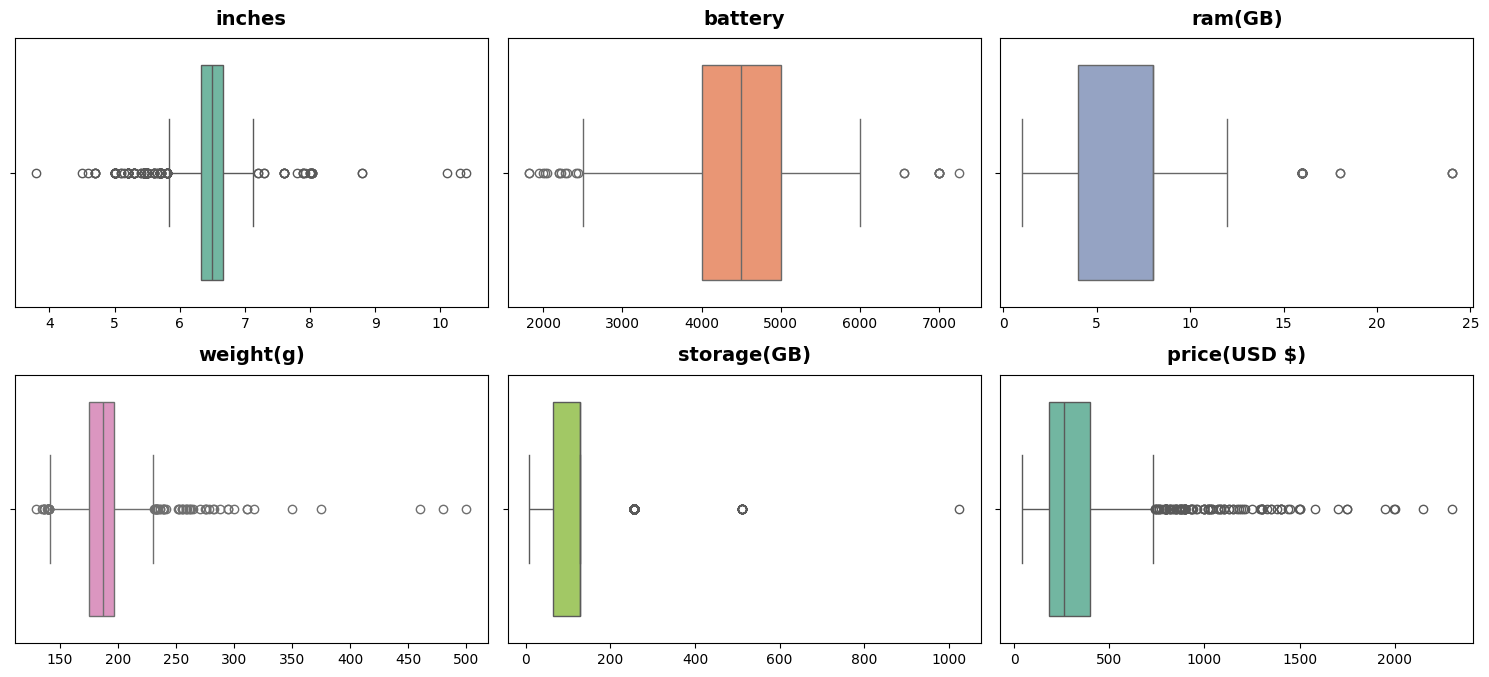

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

print('\t\t\t\t\t  Grid of Boxplots for Numerical Columns ')

fig, axes = plt.subplots(3, 3, figsize = (15, 10))
colors = sns.color_palette("Set2", n_colors=5)
axes = axes.flatten()

for i, col in enumerate(numerical.columns):
    sns.boxplot(x=numerical[col], ax=axes[i], color = colors[i % len(colors)])
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('')  #for spacing

for i in range(len(numerical.columns), 9):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# checking the outliers

<Axes: >

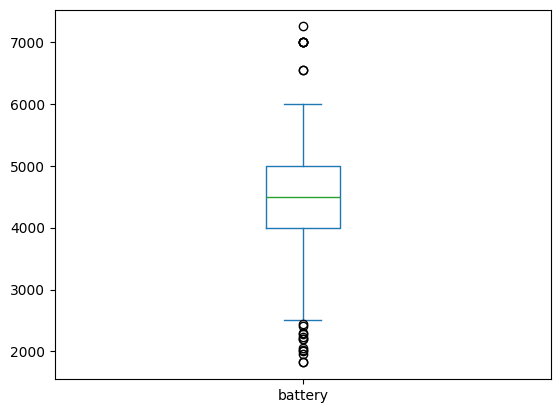

In [18]:
df["battery"].plot(kind='box')

# Replace the outliers using IQR method

In [19]:
q1=df['battery'].quantile(0.25)
q3=df['battery'].quantile(0.75)
iqr=q3-q1

In [20]:
upper_bound=q3+(1.5*iqr)
lower_bound=q1-(1.5*iqr)

In [21]:
bat_arr=df['battery']
out=bat_arr[(bat_arr<=lower_bound)|(bat_arr>=upper_bound)]                                    
print(out)

0       2200
5       2300
19      2500
27      2200
28      2050
        ... 
948     2438
1085    6550
1095    2018
1448    7000
1492    6550
Name: battery, Length: 26, dtype: int64


In [22]:
batt_arr=df['battery']
lower_cap=np.percentile(batt_arr,1)
upper_cap=np.percentile(batt_arr,99)

In [23]:
for i in df['battery']:
    if i <lower_bound:
        df['battery']=df['battery'].replace(i,lower_cap)
    elif i >upper_bound:
        df['battery']=df['battery'].replace(i,upper_cap)

<Axes: >

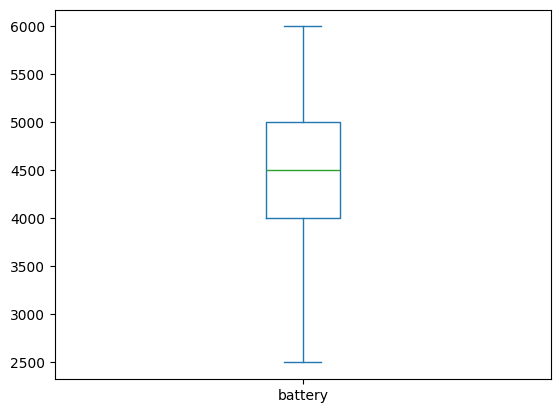

In [24]:
df["battery"].plot(kind='box')

# plot the graphs using matplotlib

# bar graph

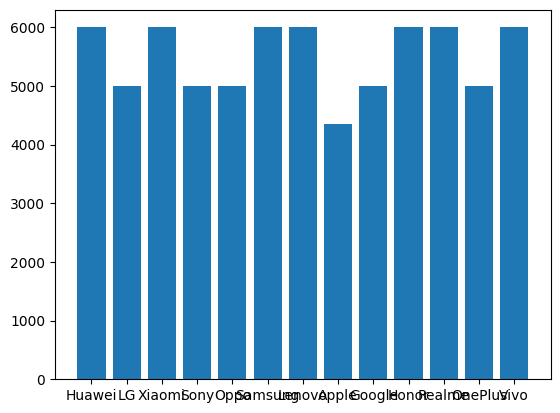

In [26]:
plt.bar(df['brand'],df['battery'])
plt.show()

# bar graph using value count

In [28]:
b=(df["brand"].value_counts())
b

brand
Xiaomi     264
Oppo       213
Samsung    206
Vivo       168
Realme     157
Huawei     137
Honor      124
LG          75
OnePlus     47
Lenovo      43
Sony        37
Apple       22
Google      19
Name: count, dtype: int64

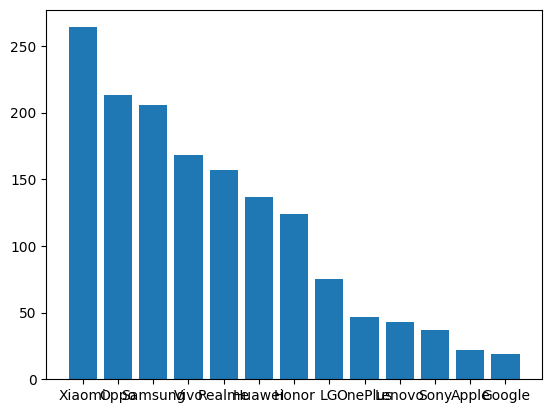

In [29]:
plt.bar(b.index,b.values)
plt.show()

# plot a pie chart

In [30]:
c=df['battery_type'].value_counts().sort_index()
c

battery_type
Li-Ion     270
Li-Po     1242
Name: count, dtype: int64

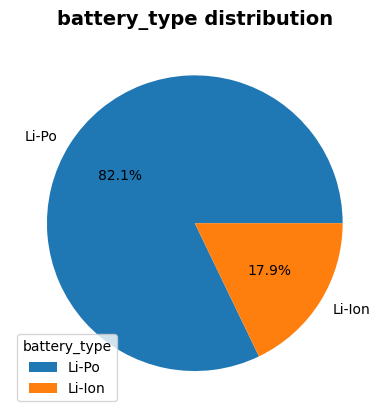

In [31]:
bc=df['battery_type'].value_counts()
plt.pie(bc,labels=bc.index,autopct='%1.1f%%')
plt.legend(labels=bc.index,title='battery_type',loc="best")
plt.title("battery_type distribution")
plt.show()

# plot a line graph

In [32]:
df["ram(GB)"].unique()

array([ 2,  4,  3,  6,  5,  1,  8, 10, 12, 16, 18, 24])

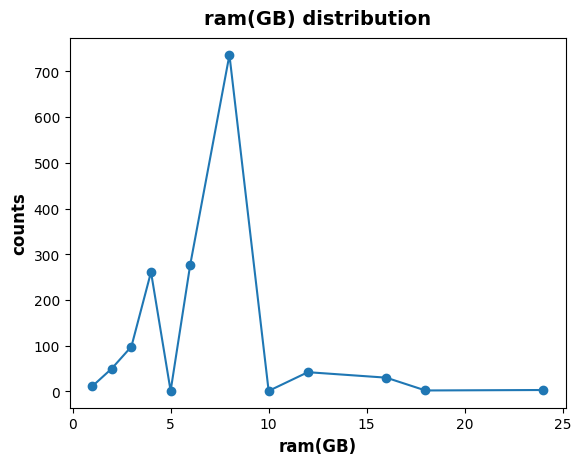

In [33]:
rc=df.groupby("ram(GB)").size()
plt.plot(rc.index,rc.values,marker="o")
plt.xlabel("ram(GB)")
plt.ylabel("counts")
plt.title("ram(GB) distribution")
plt.show()

# scatter plot for battery column

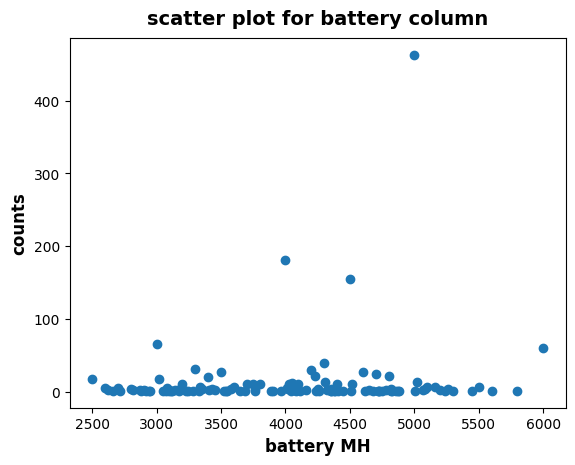

In [34]:
d=df["battery"].value_counts()
plt.scatter(d.index,d.values)
plt.xlabel('battery MH')
plt.ylabel("counts")
plt.title("scatter plot for battery column")
plt.show()

# histogram

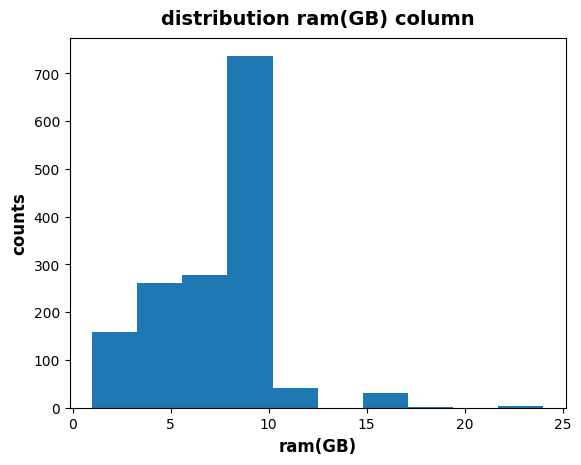

In [35]:
plt.hist(df['ram(GB)'])
plt.xlabel("ram(GB)")
plt.ylabel("counts")
plt.title("distribution ram(GB) column")
plt.show()

# Adding new column

In [36]:
df['exatra_ram']=df["ram(GB)"]+4
df

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD $),exatra_ram
0,Y6II Compact,Huawei,Android 5.1,5.00,720x1280,2500,Li-Po,2,01-09-2016,140,...,False,False,True,False,False,False,False,False,120.000,6
1,K20 plus,LG,Android 7.0,5.30,720x1280,2700,Li-Ion,2,01-12-2016,140,...,False,False,True,False,False,False,False,False,100.000,6
2,P8 Lite (2017),Huawei,Android 7.0,5.20,1080x1920,3000,Li-Ion,4,01-01-2017,147,...,False,False,True,False,False,False,False,False,420.000,8
3,Redmi Note 4,Xiaomi,Android 6.0,5.50,1080x1920,4100,Li-Po,4,01-01-2017,165,...,False,False,True,False,True,False,False,False,150.000,8
4,P10,Huawei,Android 7.0,5.10,1080x1920,3200,Li-Ion,4,01-02-2017,145,...,True,False,True,True,False,False,False,False,420.000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,vivo Y77t,Vivo,Android 13,6.64,1080x2388,5000,Li-Po,8,18-08-2023,190,...,False,False,True,False,False,False,False,False,170.000,12
1508,11x,Realme,Android 13,6.72,1080x2400,5000,Li-Po,8,23-08-2023,190,...,False,False,True,False,False,False,False,False,182.880,12
1509,GT5,Realme,Android 13,6.74,1240x2772,5240,Li-Po,16,28-08-2023,205,...,True,False,False,True,False,False,False,False,380.000,20
1510,GT5 240W,Realme,Android 13,6.74,1240x2772,4600,Li-Po,24,28-08-2023,205,...,True,False,False,True,False,False,False,False,470.000,28


# Drop the column

In [37]:
df.drop(["video_8K",'video_120fps','video_960fps'],axis=1,inplace=True)

In [38]:
df

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),storage(GB),video_720p,video_1080p,video_4K,video_30fps,video_60fps,video_240fps,video_480fps,price(USD $),exatra_ram
0,Y6II Compact,Huawei,Android 5.1,5.00,720x1280,2500,Li-Po,2,01-09-2016,140,16.0,True,False,False,True,False,False,False,120.000,6
1,K20 plus,LG,Android 7.0,5.30,720x1280,2700,Li-Ion,2,01-12-2016,140,16.0,False,True,False,True,False,False,False,100.000,6
2,P8 Lite (2017),Huawei,Android 7.0,5.20,1080x1920,3000,Li-Ion,4,01-01-2017,147,16.0,False,True,False,True,False,False,False,420.000,8
3,Redmi Note 4,Xiaomi,Android 6.0,5.50,1080x1920,4100,Li-Po,4,01-01-2017,165,32.0,True,True,False,True,False,False,False,150.000,8
4,P10,Huawei,Android 7.0,5.10,1080x1920,3200,Li-Ion,4,01-02-2017,145,32.0,True,True,True,True,True,False,False,420.000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,vivo Y77t,Vivo,Android 13,6.64,1080x2388,5000,Li-Po,8,18-08-2023,190,256.0,False,True,False,True,False,False,False,170.000,12
1508,11x,Realme,Android 13,6.72,1080x2400,5000,Li-Po,8,23-08-2023,190,128.0,False,True,False,True,False,False,False,182.880,12
1509,GT5,Realme,Android 13,6.74,1240x2772,5240,Li-Po,16,28-08-2023,205,256.0,True,True,True,False,True,False,False,380.000,20
1510,GT5 240W,Realme,Android 13,6.74,1240x2772,4600,Li-Po,24,28-08-2023,205,1024.0,True,True,True,False,True,False,False,470.000,28


# How are the battery types distributed?

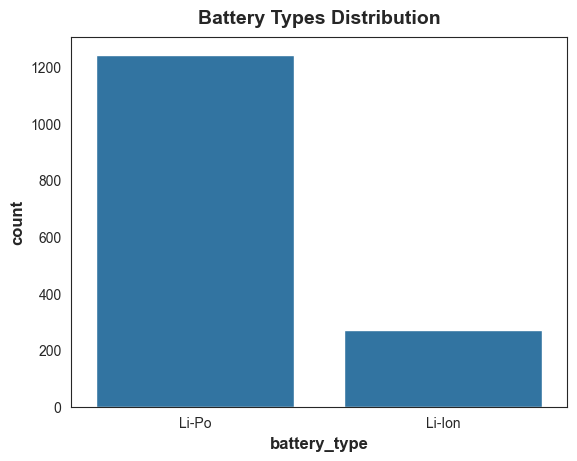

In [39]:
sns.set_style('white')
sns.countplot(data = df, x = 'battery_type')
plt.title('Battery Types Distribution')
plt.show()

In [43]:
video_dist = df[['video_720p', 'video_1080p',
       'video_4K','video_30fps', 'video_60fps',
       'video_240fps', 'video_480fps']].sum()
video_dist

video_720p       816
video_1080p     1503
video_4K         801
video_30fps     1348
video_60fps      566
video_240fps     202
video_480fps      35
dtype: int64

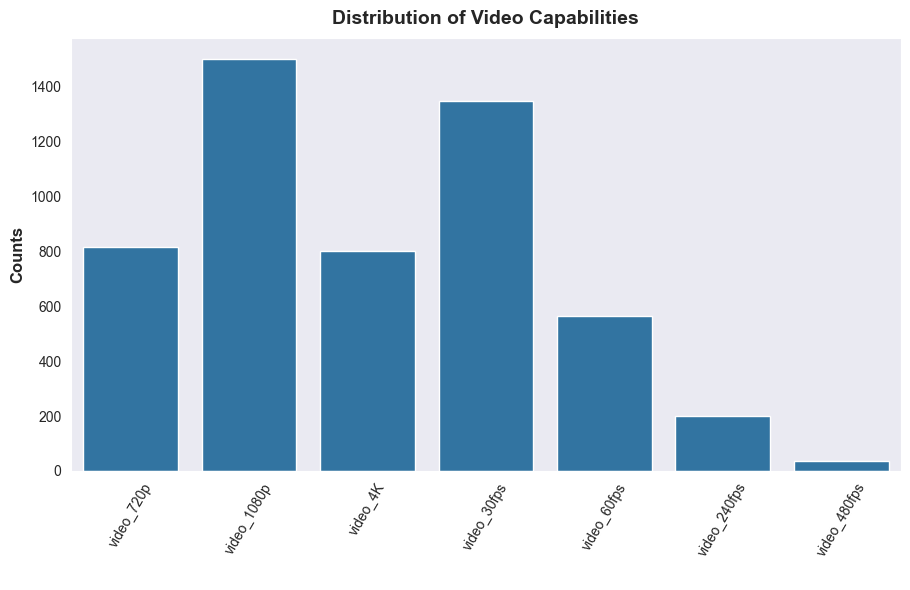

In [46]:
plt.subplots(figsize = (9, 6))
sns.set_style('dark')
sns.barplot(x = video_dist.index, y = video_dist.values)

plt.title('Distribution of Video Capabilities')
plt.xticks(rotation = 60)
plt.tight_layout()
plt.xlabel(" ")
plt.ylabel("Counts")
plt.show()

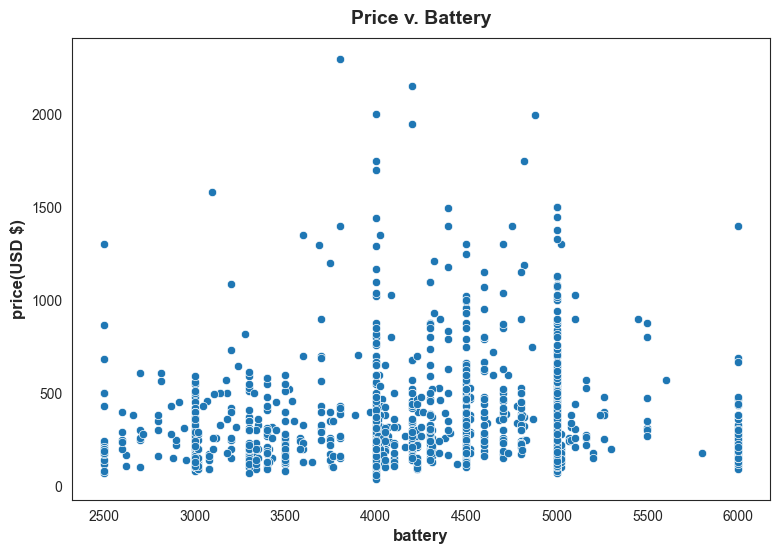

In [49]:
plt.figure(figsize = (9, 6))
sns.set_style('white')
sns.scatterplot(data = df, x = 'battery', y = 'price(USD $)')
plt.title('Price v. Battery')
plt.show()

In [50]:
df.isnull().sum()

phone_name      0
brand           0
os              0
inches          0
resolution      0
               ..
video_60fps     0
video_240fps    0
video_480fps    0
price(USD $)    0
exatra_ram      0
Length: 20, dtype: int64